In [27]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import os
%matplotlib inline

In [28]:
os.getcwd()

'D:\\mywork\\DACON_CONTEST_2019'

In [29]:
os.chdir('D:\mywork\DACON_CONTEST_2019')

## TEST dataset으로 실험

In [30]:
test_dataset = pd.read_csv('.\SOOMIN\data\TEST_DHweightDaconArima_NAFilled.csv')

In [31]:
test_dataset # 7016 rows × 201 columns

,Time,X26,X303,X241,X435,X402,X352,X305,X350,X326,...,X283,X329,X223,X266,X20,X443,X347,X75,X107,X230
0,2017-08-29 10:00:00,1.473264,0.431000,0.276000,0.228000,0.432000,0.232000,0.348000,0.259000,0.194000,...,0.114000,0.087000,0.283000,0.342026,1.160255,0.094000,0.351000,1.109,0.225,0.296678
1,2017-08-29 11:00:00,1.473264,0.398000,0.293000,0.358000,0.350000,0.232000,0.253000,0.260000,0.168000,...,0.163000,0.086000,0.288000,0.342026,1.160255,0.196000,0.343000,1.109,0.225,0.296678
2,2017-08-29 12:00:00,1.473264,0.427000,0.383000,0.462000,0.410000,0.228000,0.243000,0.429000,0.146000,...,0.192000,0.181000,0.323000,0.342026,1.160255,0.111000,0.322000,1.109,0.225,0.296678
3,2017-08-29 13:00:00,1.473264,0.727000,0.351000,0.608000,0.491000,0.234000,0.243000,0.458000,0.184000,...,0.121000,0.141000,0.339000,0.342026,1.160255,0.110000,0.203000,1.109,0.225,0.296678
4,2017-08-29 14:00:00,1.473264,1.208000,0.336000,0.454000,0.404000,0.242000,0.228000,0.333000,0.146000,...,0.214000,0.096000,0.241000,0.342026,1.160255,0.106000,0.133000,1.109,0.225,0.296678
5,2017-08-29 15:00:00,1.473264,0.819000,0.308000,0.342000,0.448000,0.213000,0.235000,0.255000,0.149000,...,0.125000,0.096000,0.277000,0.342026,1.160255,0.077000,0.136000,1.109,0.225,0.296678
6,2017-08-29 16:00:00,1.473264,0.438000,0.250000,0.269000,0.414000,0.248000,0.235000,0.355000,0.163000,...,0.177000,0.092000,0.241000,0.342026,1.160255,0.096000,0.091000,1.109,0.225,0.296678
7,2017-08-29 17:00:00,1.473264,0.417000,0.239000,0.260000,0.731000,0.215000,0.275000,0.496000,0.148000,...,0.284000,0.091000,0.264000,0.342026,1.160255,0.093000,0.168000,1.109,0.225,0.296678
8,2017-08-29 18:00:00,1.473264,0.457000,0.328000,0.272000,0.537000,0.247000,0.298000,0.471000,0.140000,...,0.146000,0.089000,0.425000,0.342026,1.160255,0.093000,0.116000,1.109,0.225,0.296678
9,2017-08-29 19:00:00,1.473264,0.537000,0.351000,0.188000,0.649000,0.362000,0.406000,0.464000,0.111000,...,0.246000,0.184000,0.459000,0.342026,1.160255,0.075000,0.349000,1.109,0.225,0.296678


In [36]:
df = test_dataset.copy()

In [37]:
df['Time'] = pd.to_datetime(df['Time'])
df = df.set_index('Time')

Text(0, 0.5, 'value')

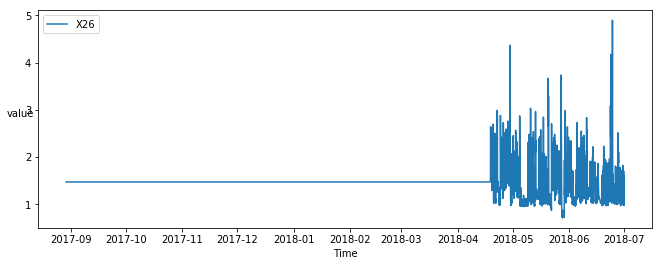

In [38]:
plt.figure(figsize=(11,4))
plt.plot(df.iloc[:, 0])
plt.legend()
plt.xlabel('Time')
plt.ylabel('value', rotation=0)

## 인덱스를 버리고, time_series로 만듬

In [35]:
# df.reset_index(drop=True)

,X26,X303,X241,X435,X402,X352,X305,X350,X326,X299,...,X283,X329,X223,X266,X20,X443,X347,X75,X107,X230
0,1.473264,0.431000,0.276000,0.228000,0.432000,0.232000,0.348000,0.259000,0.194000,0.086000,...,0.114000,0.087000,0.283000,0.342026,1.160255,0.094000,0.351000,1.109,0.225,0.296678
1,1.473264,0.398000,0.293000,0.358000,0.350000,0.232000,0.253000,0.260000,0.168000,0.084000,...,0.163000,0.086000,0.288000,0.342026,1.160255,0.196000,0.343000,1.109,0.225,0.296678
2,1.473264,0.427000,0.383000,0.462000,0.410000,0.228000,0.243000,0.429000,0.146000,0.054000,...,0.192000,0.181000,0.323000,0.342026,1.160255,0.111000,0.322000,1.109,0.225,0.296678
3,1.473264,0.727000,0.351000,0.608000,0.491000,0.234000,0.243000,0.458000,0.184000,0.059000,...,0.121000,0.141000,0.339000,0.342026,1.160255,0.110000,0.203000,1.109,0.225,0.296678
4,1.473264,1.208000,0.336000,0.454000,0.404000,0.242000,0.228000,0.333000,0.146000,0.055000,...,0.214000,0.096000,0.241000,0.342026,1.160255,0.106000,0.133000,1.109,0.225,0.296678
5,1.473264,0.819000,0.308000,0.342000,0.448000,0.213000,0.235000,0.255000,0.149000,0.076000,...,0.125000,0.096000,0.277000,0.342026,1.160255,0.077000,0.136000,1.109,0.225,0.296678
6,1.473264,0.438000,0.250000,0.269000,0.414000,0.248000,0.235000,0.355000,0.163000,0.118000,...,0.177000,0.092000,0.241000,0.342026,1.160255,0.096000,0.091000,1.109,0.225,0.296678
7,1.473264,0.417000,0.239000,0.260000,0.731000,0.215000,0.275000,0.496000,0.148000,0.203000,...,0.284000,0.091000,0.264000,0.342026,1.160255,0.093000,0.168000,1.109,0.225,0.296678
8,1.473264,0.457000,0.328000,0.272000,0.537000,0.247000,0.298000,0.471000,0.140000,0.343000,...,0.146000,0.089000,0.425000,0.342026,1.160255,0.093000,0.116000,1.109,0.225,0.296678
9,1.473264,0.537000,0.351000,0.188000,0.649000,0.362000,0.406000,0.464000,0.111000,0.377000,...,0.246000,0.184000,0.459000,0.342026,1.160255,0.075000,0.349000,1.109,0.225,0.296678


In [ ]:
# t_min, t_max = 0, 7015
# resolution = 0.1

# def time_series(t):
#     return t * np.sin(t) / 3 + 2 * np.sin(t*5)

In [45]:
df.index[0]

(Timestamp('2017-08-29 10:00:00'), Timestamp('2018-06-30 23:00:00'))

In [46]:
def next_batch(batch_size, n_steps):
    t0 = np.random.rand(batch_size, 1) * (df.index[-1] - df.index[0] - n_steps * resolution)
    Ts = t0 + np.arange(0., n_steps + 1) * resolution
    ys = time_series(Ts)
    return ys[:, :-1].reshape(-1, n_steps, 1), ys[:, 1:].reshape(-1, n_steps, 1)

In [47]:
n_steps = 20
n_neurons = 100
n_inputs = 1
n_outputs = 1

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None, n_steps, n_outputs])

In [51]:
y

<tf.Tensor 'Placeholder_3:0' shape=(?, 20, 1) dtype=float32>

In [48]:
# RNN Model
cell = tf.nn.rnn_cell.BasicRNNCell(num_units=n_neurons, activation=tf.nn.relu)
rnn_outputs, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)

# 하나의 출력을 위한 작업
stacked_rnn_outputs = tf.reshape(tensor=rnn_outputs, shape=[-1, n_neurons])
stacked_outputs = tf.layers.dense(stacked_rnn_outputs, n_outputs)
predictions = tf.reshape(stacked_outputs, [-1, n_steps, n_outputs])

ValueError: Variable rnn/basic_rnn_cell/kernel already exists, disallowed. Did you mean to set reuse=True or reuse=tf.AUTO_REUSE in VarScope? Originally defined at:

  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 2005, in __init__
    self._traceback = tf_stack.extract_stack()
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 3616, in create_op
    op_def=op_def)
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\util\deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 788, in _apply_op_helper
    op_def=op_def)
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\gen_state_ops.py", line 1608, in variable_v2
    shared_name=shared_name, name=name)


In [22]:
learning_rate = 0.001
n_iterations = 600
batch_size = 50

In [23]:
# loss
mse = tf.losses.mean_squared_error(labels=y, predictions=predictions)
# optimizer
train_op = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(mse)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [26]:
# Train
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    for iteration in range(n_iterations):
        batch_x, batch_y = next_batch(batch_size, n_steps)
        sess.run(train_op, feed_dict={X: batch_x, y: batch_y})
        if iteration % 100 == 0:
            loss = mse.eval(feed_dict={X: batch_x, y: batch_y})
            print('step: {:03d}, MSE: {:.4f}'.format(iteration, loss))
            
    # 새로운 데이터 예측하기
    X_new = time_series(np.array(t_instance[:-1].reshape(-1, n_steps, n_inputs)))
    y_pred = sess.run(predictions, feed_dict={X: X_new})
    
print('y_pred:{}\n{}'.format(y_pred.shape, y_pred))   

NameError: name 't_max' is not defined